In [309]:
import os
import time
import urllib2
from cookielib import CookieJar

import cookielib, urllib2

from urllib2 import Request
import urllib
import pandas as pd
import os
import time
from time import mktime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

import re 

path = "/Users/Amir/Downloads/intraQuarter"

def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    
    
    stock_list_m = []
    ticker_list=[]
    for e in stock_list[1:2]:
        stock_list_m.append(e.split('/')[-1])
        
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'DE Ratio',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 'Status'])
    
    sp500_df = pd.DataFrame.from_csv('YAHOO-INDEX_GSPC.csv')
    
    for each_dir in stock_list[1:50]:
        #print each_dir
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/')[-1]
        ticker_list.append(ticker)
        #print ticker
        
        starting_stock_value = False
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file:
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                #print date_stamp
                unix_time = time.mktime(date_stamp.timetuple())
                #print(date_stamp, unix_time)
                #time.sleep(15)
                full_file_path = each_dir+'/'+file
                #print(full_file_path)
                source = open(full_file_path,'r').read()
                try:
                    try:
                        
                        value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except:
                        value = float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])
                        #value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    
                    #print(ticker+":",value,date_stamp)
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value = float(row["Adjusted Close"])
                        
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adjusted Close"])
                        
                    try:
                        
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0])
                    except:
                        
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0])
                            #print(stock_price)

                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
            
                            stock_price = float(stock_price.group(1))
                            #print(stock_price)
                        except:

                            try:
                                stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>')[0])
                                #print(stock_price)

                                stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                
                                stock_price = float(stock_price.group(1))
                                #print(stock_price)

                            except:
                                pass

                            
                        
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                    
                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100
                    location = len(df['Date'])
                    
                    location = len(df['Date'])
                    difference = stock_p_change-sp500_p_change
                    
                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"

                    
                    df = df.append({'Date':date_stamp,
                                    'Unix': unix_time, 
                                    'Ticker': ticker, 
                                    'DE Ratio': value,
                                    'Price': stock_price,
                                    'stock_p_change': stock_p_change, 
                                    'SP500': sp500_value,
                                    'sp500_p_change': sp500_p_change,
                                    'Difference': stock_p_change-sp500_p_change,
                                    'Status':status}, ignore_index = True)
                    
                except Exception as e:
                    pass
    for each_ticker in ticker_list:
        try:
            plot_df = df[(df['Ticker'] == each_ticker)]

            plot_df = plot_df.set_index(['Date'])


            if plot_df['Status'][-1] == 'underperform':
                color = 'r'
            else:
                color = 'g'

            
            plot_df['Difference'].plot(label=each_ticker, color=color)
            plt.legend()
        except Exception as e:
            print(str(e))

    plt.show()
    
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    #print(save)
    
    df.to_csv(save)
    #dff=pd.read_csv(save,index_col=0)
    #print dff.tail(100)

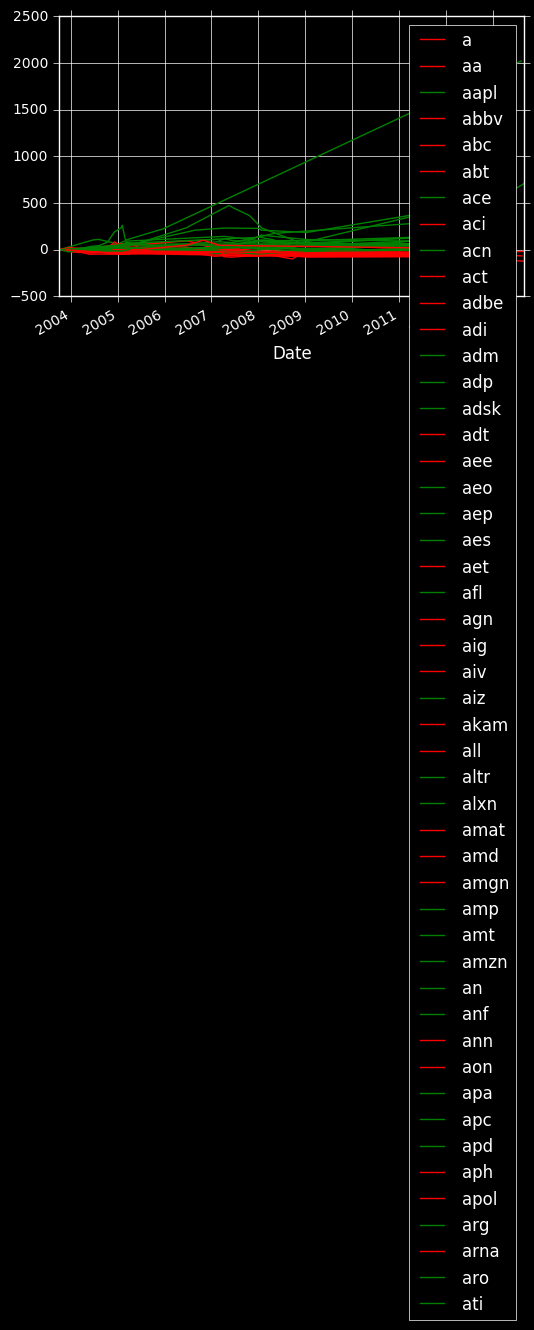

In [310]:
Key_Stats()


In [300]:
 sp500_df = pd.DataFrame.from_csv('YAHOO-INDEX_GSPC.csv')

In [146]:
sp500_df.head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-02-28,2366.080078,2367.790039,2358.959961,2363.639893,4.210140e+09,2363.639893
2017-02-27,2365.229980,2371.540039,2361.870117,2369.729980,3.582610e+09,2369.729980
2017-02-24,2355.729980,2367.340088,2352.870117,2367.340088,3.831570e+09,2367.340088
2017-02-23,2367.500000,2368.260010,2355.090088,2363.810059,4.015260e+09,2363.810059
2017-02-22,2361.110107,2365.129883,2358.340088,2362.820068,3.468670e+09,2362.820068


In [ ]:
row=sp500_df[(sp500_df.index==)]

In [224]:
sp500_df.index[1]

Timestamp('2017-02-27 00:00:00')

In [225]:
time.mktime(sp500_df.index[1].timetuple())

1488171600.0

In [207]:
sp500_df.iloc[1]

Open              2.365230e+03
High              2.371540e+03
Low               2.361870e+03
Close             2.369730e+03
Volume            3.582610e+09
Adjusted Close    2.369730e+03
Name: 2017-02-27 00:00:00, dtype: float64

In [213]:
sp500_df.iloc[1].name.timetuple()

Open              2.365230e+03
High              2.371540e+03
Low               2.361870e+03
Close             2.369730e+03
Volume            3.582610e+09
Adjusted Close    2.369730e+03
Name: 2017-02-27 00:00:00, dtype: float64

In [211]:
sp500_df.iloc[1].name.timetuple().tm_year

2017

In [212]:
sp500_df[(Date)]

NameError: name 'Date' is not defined

In [311]:
'''All the features'''


'All the features'

In [324]:
import os
import time
import urllib2
from cookielib import CookieJar

import cookielib, urllib2

from urllib2 import Request
import urllib
import pandas as pd
import os
import time
from time import mktime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

import re 

path = "/Users/Amir/Downloads/intraQuarter"

def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    
    
    stock_list_m = []
    ticker_list=[]
    for e in stock_list[1:2]:
        stock_list_m.append(e.split('/')[-1])
    
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])   
    
    sp500_df = pd.DataFrame.from_csv('YAHOO-INDEX_GSPC.csv')
    
    for each_dir in stock_list[1:500]:
        #print each_dir
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/')[-1]
        ticker_list.append(ticker)
        #print ticker
        
        starting_stock_value = False
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file:
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                #print date_stamp
                unix_time = time.mktime(date_stamp.timetuple())
                #print(date_stamp, unix_time)
                #time.sleep(15)
                full_file_path = each_dir+'/'+file
                #print(full_file_path)
                source = open(full_file_path,'r').read()
                
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                            
                            
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                            

                            
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adjusted Close"])
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adjusted Close"])

                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0])
                    except Exception as e:
                        #    <span id="yfs_l10_afl">43.27</span>
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0])
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price = float(stock_price.group(1))

                            #print(stock_price)
                        except Exception as e:
                            try:
                                stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>')[0])
                                stock_price = re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                                stock_price = float(stock_price.group(1))
                            except Exception as e:
                                print(str(e),'a;lsdkfh',file,ticker)

                            #print('Latest:',stock_price)

                            #print('stock price',str(e),ticker,file)
                            #time.sleep(15)
                        
                    #print("stock_price:",stock_price,"ticker:", ticker)

                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value

                    

                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100

                    
                    difference = stock_p_change-sp500_p_change

                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"


                    if value_list.count("N/A") > 0:
                        pass
                    else:
                        df = df.append({'Date':date_stamp,
                                        'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                except Exception as e:
                    pass
    
    df.to_csv("key_stats.csv")
    
    #dff=pd.read_csv(save,index_col=0)
    #print dff.tail(100)

In [325]:
Key_Stats()


('list index out of range', 'a;lsdkfh', '20050131175043.html', 'cf')
('list index out of range', 'a;lsdkfh', '20071002171845.html', 'dg')
('list index out of range', 'a;lsdkfh', '20061031050110.html', 'jdsu')
('list index out of range', 'a;lsdkfh', '20070615121524.html', 'kmi')
('list index out of range', 'a;lsdkfh', '20070817074343.html', 'kmi')
('list index out of range', 'a;lsdkfh', '20060919003101.html', 'l')
('list index out of range', 'a;lsdkfh', '20061031040414.html', 'l')
('list index out of range', 'a;lsdkfh', '20070405155648.html', 'l')
('list index out of range', 'a;lsdkfh', '20070611030927.html', 'l')
('list index out of range', 'a;lsdkfh', '20041125045729.html', 'molx')
('list index out of range', 'a;lsdkfh', '20050413224345.html', 'rht')
('list index out of range', 'a;lsdkfh', '20051129055257.html', 'rht')
('list index out of range', 'a;lsdkfh', '20050424001017.html', 's')


In [111]:
'''Machine learnig with SVM'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split


FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

def Build_Data_Set(feat=FEATURES):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df.reindex(np.random.permutation(data_df.index))
    #print data_df.head(20)
    
    X = np.array(data_df[feat].values)
    
    y = (data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X = preprocessing.scale(X)
    #print X
    return X,y


def Analysis_lgr():

    test_size = 1000
    X, y = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y)
    clfl2=LogisticRegression()
    parameters = {"C": [0.001, 0.1, 1, 10, 100]}
    fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
    fitmodel.fit(Xlr, ylr)
    fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    
    clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
    clfl2.fit(Xlr, ylr)
    ypred2=clfl2.predict(Xtestlr)
    acc=accuracy_score(ypred2, ytestlr)
    #clf = svm.SVC(kernel="linear", C= 1.0)
    #clf.fit(X[:-test_size],y[:-test_size])
    
    #correct_count = 0

    #for x in range(1, test_size+1):
     #   if clf.predict(X[-x])[0] == y[-x]:
            #correct_count += 1

    #print("Accuracy:", (correct_count/test_size) * 100.00)
    return acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_


#X, y = Build_Data_Set()

Analysis_lgr()
#X, y = Build_Data_Set()

2661


(0.63963963963963966,
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 10},
 0.66065162907268171,
 [mean: 0.64461, std: 0.01851, params: {'C': 0.001},
  mean: 0.65664, std: 0.02595, params: {'C': 0.1},
  mean: 0.65865, std: 0.02305, params: {'C': 1},
  mean: 0.66065, std: 0.02407, params: {'C': 10},
  mean: 0.65915, std: 0.02242, params: {'C': 100}])

In [413]:
def Analysis_svm():

    test_size = 1000
    X, y = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y)
    clf2=svm.SVC()
    parameters = {'kernel':('linear','rbf'),'C': [0.001, 0.1, 1, 10, 100]}
    fitmodel = GridSearchCV(clf2, param_grid=parameters, cv=5, scoring="accuracy")
    fitmodel.fit(Xlr, ylr)
    fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    
    clfl2=fitmodel.best_estimator_
    clfl2.fit(Xlr, ylr)
    ypred2=clfl2.predict(Xtestlr)
    acc=accuracy_score(ypred2, ytestlr)
    #clf = svm.SVC(kernel="linear", C= 1.0)
    #clf.fit(X[:-test_size],y[:-test_size])
    
    #correct_count = 0

    #for x in range(1, test_size+1):
     #   if clf.predict(X[-x])[0] == y[-x]:
            #correct_count += 1

    #print("Accuracy:", (correct_count/test_size) * 100.00)
    return acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_ = Analysis_svm()

2661


In [411]:
acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_ 

(0.58708708708708712, SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), {'C': 100,
  'kernel': 'rbf'}, 0.61353383458646615, [mean: 0.53033, std: 0.00051, params: {'kernel': 'linear', 'C': 0.001},
  mean: 0.53033, std: 0.00051, params: {'kernel': 'rbf', 'C': 0.001},
  mean: 0.53133, std: 0.00190, params: {'kernel': 'linear', 'C': 0.1},
  mean: 0.53584, std: 0.00429, params: {'kernel': 'rbf', 'C': 0.1},
  mean: 0.53133, std: 0.00190, params: {'kernel': 'linear', 'C': 1},
  mean: 0.57945, std: 0.02482, params: {'kernel': 'rbf', 'C': 1},
  mean: 0.53133, std: 0.00190, params: {'kernel': 'linear', 'C': 10},
  mean: 0.59850, std: 0.01738, params: {'kernel': 'rbf', 'C': 10},
  mean: 0.53133, std: 0.00190, params: {'kernel': 'linear', 'C': 100},
  mean: 0.61353, std: 0.01535, params: {'kernel': 'rbf', 'C': 100}])

In [382]:
xx= pd.DataFrame.from_csv('key_stats.csv')
xx.isnull().sum()



Date                         0
Unix                         0
Ticker                       0
Price                        0
stock_p_change               0
SP500                        0
sp500_p_change               0
Difference                   0
DE Ratio                     0
Trailing P/E                 0
Price/Sales                  0
Price/Book                   0
Profit Margin                0
Operating Margin             0
Return on Assets             0
Return on Equity             0
Revenue Per Share            0
Market Cap                   0
Enterprise Value             0
Forward P/E                  0
PEG Ratio                    0
Enterprise Value/Revenue     0
Enterprise Value/EBITDA      0
Revenue                      0
Gross Profit                 0
EBITDA                       0
Net Income Avl to Common     0
Diluted EPS                  0
Earnings Growth              0
Revenue Growth               0
Total Cash                   0
Total Cash Per Share         0
Total De

In [415]:
from textblob import TextBlob

ImportError: No module named textblob

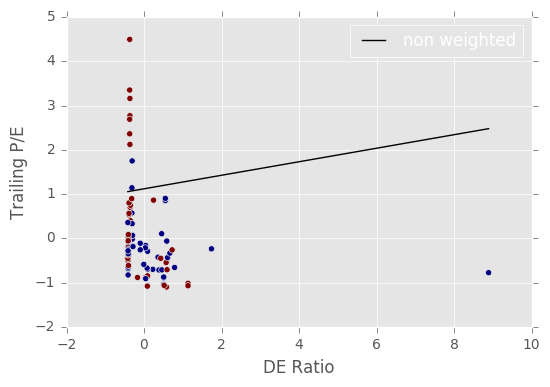

In [345]:
def Analysis():
    X, y = Build_Data_Set()

    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X,y)
    
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
    yy = a * xx - clf.intercept_[0] / w[1]

    h0 = plt.plot(xx,yy, "k-", label="non weighted")

    plt.scatter(X[:, 0],X[:, 1],c=y)
    plt.ylabel("Trailing P/E")
    plt.xlabel("DE Ratio")
    plt.legend()

    plt.show()
    
Analysis()

In [362]:
date_index = pd.date_range('1/1/2010', periods=6, freq='D')

In [359]:
print date_index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30'],
              dtype='datetime64[ns]', freq='M')


In [109]:
'''Getting daily stock_price data from the quandl'''
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import quandl
auth_tok = "Xnk6rNeJsbDQxxsCy3m4"

path = "/Users/Amir/Downloads/intraQuarter"

def Stock_Prices():
    df = pd.DataFrame()
    
    ticker_list=[]
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]

    print(stock_list)

    for each_dir in stock_list[1:]:
        try:
            ticker = each_dir.split('/')[-1]
            ticker_list.append(ticker)
            print(ticker)
            name = "WIKI/"+ticker.upper()
            data = quandl.get(name,
                              trim_start = "2000-12-12",
                              trim_end = "2014-12-30",
                              authtoken=auth_tok)
            data[ticker.upper()] = data["Adj. Close"]
            df = pd.concat([df, data[ticker.upper()]], axis = 1)

        except Exception as e:
            print(str(e))
            #time.sleep(10)


    df.to_csv("stock_prices.csv")
                
Stock_Prices()

['/Users/Amir/Downloads/intraQuarter/_KeyStats', '/Users/Amir/Downloads/intraQuarter/_KeyStats/a', '/Users/Amir/Downloads/intraQuarter/_KeyStats/aa', '/Users/Amir/Downloads/intraQuarter/_KeyStats/aapl', '/Users/Amir/Downloads/intraQuarter/_KeyStats/abbv', '/Users/Amir/Downloads/intraQuarter/_KeyStats/abc', '/Users/Amir/Downloads/intraQuarter/_KeyStats/abt', '/Users/Amir/Downloads/intraQuarter/_KeyStats/ace', '/Users/Amir/Downloads/intraQuarter/_KeyStats/aci', '/Users/Amir/Downloads/intraQuarter/_KeyStats/acn', '/Users/Amir/Downloads/intraQuarter/_KeyStats/act', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adbe', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adi', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adm', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adp', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adsk', '/Users/Amir/Downloads/intraQuarter/_KeyStats/adt', '/Users/Amir/Downloads/intraQuarter/_KeyStats/aee', '/Users/Amir/Downloads/intraQuarter/_KeyStats/aeo', '/Users/Amir/D

In [ ]:
path = "/Users/Amir/Downloads/intraQuarter"


In [25]:
'''Adding stock prices to the rest of the data that we had'''
import os
import time
import urllib2
from cookielib import CookieJar

import cookielib, urllib2

from urllib2 import Request
import urllib
import pandas as pd
import os
import time
from time import mktime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

import re 

path = "/Users/Amir/Downloads/intraQuarter"

def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    
    
    stock_list_m = []
    ticker_list=[]
    for e in stock_list[1::]:
        stock_list_m.append(e.split('/')[-1])
    
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])   
    
    sp500_df = pd.DataFrame.from_csv('YAHOO-INDEX_GSPC.csv')
    stock_df = pd.DataFrame.from_csv('stock_prices.csv')
    
    for each_dir in stock_list[1:]:
        #print each_dir
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/')[-1]
        ticker_list.append(ticker)
        #print ticker
        
        #tarting_stock_value = False
        #starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                            
                            
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                            

                            
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        #print row[1]

                        sp500_value = float(row["Adjusted Close"])
                    except:
                        try:
                            sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == sp500_date)]
                            sp500_value = float(row["Adjusted Close"])
                        except Exception as e:
                            print("fapsdolkfhasf;lsak",str(e))


                    one_year_later = int(unix_time + 31536000)

                    try:
                        sp500_1y = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_1y)]
                        #row1=row.ix[0][1]
                        #print row1
                        sp500_1y_value = float(row["Adjusted Close"])
                    except:
                        try:
                            sp500_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == sp500_1y)]
                            
                            sp500_1y_value = float(row["Adjusted Close"])
                        except Exception as e:
                            print("sp500 1 year later issue",str(e))



                    try:
                        stock_price_1y = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = stock_df[(stock_df.index == stock_price_1y)][ticker.upper()]
                        #print (row,'oioi',float(row))
                        

                        stock_1y_value = round(float(row),2)
##                        print(stock_1y_value)
##                        time.sleep(1555)
                    
                    except Exception as e:
                        try:
                            stock_price_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = stock_df[(stock_df.index == stock_price_1y)][ticker.upper()]
                            stock_1y_value = round(float(row),2)
                        except Exception as e:
                            print("stock price:",str(e))




                    try:
                        stock_price = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = stock_df[(stock_df.index == stock_price)][ticker.upper()]
                        stock_price = round(float(row),2)
                    
                    except Exception as e:
                        try:
                            stock_price = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row = stock_df[(stock_df.index == stock_price)][ticker.upper()]
                            stock_price = round(float(row),2)
                        except Exception as e:
                            print("stock price:",str(e))




                    stock_p_change = round((((stock_1y_value - stock_price) / stock_price) * 100),2)
                    sp500_p_change = round((((sp500_1y_value - sp500_value) / sp500_value) * 100),2)

                    
                    difference = stock_p_change-sp500_p_change

                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"


                    if value_list.count("N/A") > 15:
                        pass
                    else:
                        

                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                except Exception as e:
                    pass


    df.to_csv("key_stats_acc_perf_WITH_NA.csv")
    

Key_Stats()
    
    

('sp500 1 year later issue', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('sp500 1 year later issue', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('fapsdolkfhasf;lsak', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('fapsdolkfhasf;lsak', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('fapsdolkfhasf;lsak', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('stock price:', "'ACT'")
('stock price:', "'ACT'")
('fapsdolkfhasf;lsak', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>")
('fapsdolkfhasf;lsak', "cannot convert the series to <type 'float'>")
('stock price:', "cannot convert the series to <type 'float'>"

In [106]:
'''Machine learnig with SVM'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split


FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

def Build_Data_Set(feat=FEATURES):
    data_df = pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA.csv")

    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df = data_df.replace('NaN',0).replace('N/A',0)
    #print data_df.head(20)
    
    X = np.array(data_df[feat].values)
    
    y = (data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X = preprocessing.scale(X)
    Z = np.array(data_df[["stock_p_change","sp500_p_change"]].values)
    #print X
    return X,y, Z


def Analysis_lgr():

    test_size = 1000
    X, y, z = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr, zlr, ztestlr = train_test_split(X,y,z)
    clfl2=LogisticRegression()
    parameters = {"C": [0.001, 0.1, 1, 10,100]}
    fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
    fitmodel.fit(Xlr, ylr)
    fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    
    clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
    clfl2.fit(Xlr, ylr)
    ypred2=clfl2.predict(Xtestlr)
    acc=accuracy_score(ypred2, ytestlr)
    #clf = svm.SVC(kernel="linear", C= 1.0)
    #clf.fit(X[:-test_size],y[:-test_size])
    
    return acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_, ypred2, Xtestlr ,ytestlr, z 


#X, y = Build_Data_Set()

acc, best_estimator_, best_params_, best_score_, grid_scores_, ypred2, Xtestlr, ytestlr, ztestlr =  Analysis_lgr()


3012


In [107]:

def invest_ana():
    
    acc, best_estimator_, best_params_, best_score_, grid_scores_, ypred2, Xtestlr, ytestlr, Z =  Analysis_lgr()

    correct_count =0
    inves=1000
    test_size = len(ytestlr)
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    for i in range(len(ypred2)):
        if ypred2[i]==ytestlr[i]:
            correct_count+=1
        if ypred2[i] == 1:
            invest_return = invest_amount + (invest_amount * (Z[i][0]/100))
            market_return = invest_amount + (invest_amount * (Z[i][1]/100))
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    print(correct_count,test_size)
    print("Accuracy:", (1.0*correct_count/test_size) * 100.00)

    print("Total Trades:", total_invests)
    print("Ending with Strategy:",if_strat)
    print("Ending with Market:",if_market)

    compared = ((if_strat - if_market) / if_market) * 100.0
    do_nothing = total_invests * invest_amount

    avg_market = ((if_market - do_nothing) / do_nothing) * 100.0
    avg_strat = ((if_strat - do_nothing) / do_nothing) * 100.0


    
    print("Compared to market, we earn",str(compared)+"% more")
    print("Average investment return:", str(avg_strat)+"%")
    print("Average market return:", str(avg_market)+"%")
    

        
        #if ypred2[i] == ytestlr[i]:
            #c_cont+=1


invest_ana()

3012
(428, 753)
('Accuracy:', 56.83930942895087)
('Total Trades:', 517)
('Ending with Strategy:', 6062001.0)
('Ending with Market:', 5818247.0)
('Compared to market, we earn', '4.18947493979% more')
('Average investment return:', '17.2534042553%')
('Average market return:', '12.5386266925%')


In [103]:
'''SVM classifer'''

from sklearn.svm import SVC

def Build_Data_Set(feat=FEATURES):
    data_df = pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA.csv")

    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df = data_df.replace('NaN',0).replace('N/A',0)
    #print data_df.head(20)
    
    X = np.array(data_df[feat].values)
    
    y = (data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X = preprocessing.scale(X)
    Z = np.array(data_df[["stock_p_change","sp500_p_change"]].values)
    #print X
    return X,y, Z

def Analysis_svm():

    test_size = 1000
    X, y, z = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr, zlr, ztestlr = train_test_split(X,y,z)
    clfl2 =  SVC()
    parameters = {'kernel':('linear', 'rbf'),'C': [10,100,200]}
    fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
    fitmodel.fit(Xlr, ylr)
    fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    
    clfl2=fitmodel.best_estimator_
    clfl2.fit(Xlr, ylr)
    ypred2=clfl2.predict(Xtestlr)
    acc=accuracy_score(ypred2, ytestlr)
    #clf = svm.SVC(kernel="linear", C= 1.0)
    #clf.fit(X[:-test_size],y[:-test_size])
    
    correct_count = 0

    #for x in range(0, len(ypred2)):
     #   if clf.predict(X[-x])[0] == y[-x]:
            #correct_count += 1

    #print("Accuracy:", (correct_count/test_size) * 100.00)
    return acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_, ypred2, Xtestlr ,ytestlr, z 


#X, y = Build_Data_Set()

acc, best_estimator_, best_params_, best_score_, grid_scores_, ypred2, Xtestlr, ytestlr, ztestlr =  Analysis_svm()


3012


In [99]:
acc, best_estimator_, best_params_, best_score_, grid_scores_

(0.70252324037184599, SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), {'C': 100,
  'kernel': 'rbf'}, 0.69411243913235943, [mean: 0.53918, std: 0.00977, params: {'kernel': 'linear', 'C': 0.001},
  mean: 0.53873, std: 0.00008, params: {'kernel': 'rbf', 'C': 0.001},
  mean: 0.57105, std: 0.00800, params: {'kernel': 'linear', 'C': 0.1},
  mean: 0.54847, std: 0.00838, params: {'kernel': 'rbf', 'C': 0.1},
  mean: 0.57415, std: 0.00763, params: {'kernel': 'linear', 'C': 1},
  mean: 0.62506, std: 0.01324, params: {'kernel': 'rbf', 'C': 1},
  mean: 0.57371, std: 0.00361, params: {'kernel': 'linear', 'C': 10},
  mean: 0.67818, std: 0.01591, params: {'kernel': 'rbf', 'C': 10},
  mean: 0.57105, std: 0.00302, params: {'kernel': 'linear', 'C': 100},
  mean: 0.69411, std: 0.01200, params: {'kernel': 'rbf', 'C': 100}])

In [104]:
    Z= ztestlr
    correct_count =0
    inves=1000
    test_size = len(ytestlr)
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    for i in range(len(ypred2)):
        if ypred2[i]==ytestlr[i]:
            correct_count+=1
        if ypred2[i] == 1:
            invest_return = invest_amount + (invest_amount * (Z[i][0]/100))
            market_return = invest_amount + (invest_amount * (Z[i][1]/100))
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    print(correct_count,test_size)
    print("Accuracy:", (1.0*correct_count/test_size) * 100.00)

    print("Total Trades:", total_invests)
    print("Ending with Strategy:",if_strat)
    print("Ending with Market:",if_market)

    compared = ((if_strat - if_market) / if_market) * 100.0
    do_nothing = total_invests * invest_amount

    avg_market = ((if_market - do_nothing) / do_nothing) * 100.0
    avg_strat = ((if_strat - do_nothing) / do_nothing) * 100.0


    
    print("Compared to market, we earn",str(compared)+"% more")
    print("Average investment return:", str(avg_strat)+"%")
    print("Average market return:", str(avg_market)+"%")
    

        
        #if ypred2[i] == ytestlr[i]:
            #c_cont+=1



(528, 753)
('Accuracy:', 70.1195219123506)
('Total Trades:', 414)
('Ending with Strategy:', 4987111.0)
('Ending with Market:', 4675351.0)
('Compared to market, we earn', '6.66816245454% more')
('Average investment return:', '20.4616183575%')
('Average market return:', '12.9311835749%')


In [101]:
Z

array([[ 14.82,  20.22],
       [ 55.69,  26.34],
       [  0.8 ,   4.75],
       ..., 
       [ 12.44,   6.15],
       [  8.49,   8.61],
       [ 31.97,  17.92]])